In [1]:
import urllib
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
import folium

# Part 1: Temporal Patterns

We look only at the focus-crimes in the exercise below

In [2]:
# List of focus crimes
focuscrimes = ['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT']

# Alphabetical order
focuscrimes = sorted(focuscrimes)

*Exercise*: More temporal patterns. During week 1, we plotted some crime development over time (how each of the focus-crimes changed over time, year-by-year).

In this exercise, please generate the visualizations described below. Use the same date-ranges as in Week 1. For each set of plots, describe the plots (as you would in the figure text in a report or paper), and pick a few aspects that stand out to you and comment on those (a couple of ideas below for things that could be interesting to comment on ... but it's OK to chose something else).

In [3]:
# Import the data
data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")

# Transform to datetime
data['Time']= [d+ ' ' +t for (d,t) in zip(data.Date, data.Time)]
data['Time']= pd.to_datetime(data['Time'])
data['Date']= pd.to_datetime(data['Date'])

# Take only the focus crimes
data_focus_crimes = data[data.Category.isin(focuscrimes)]

- *Weekly patterns*. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. Here's what my version looks like. Hint for comment: Some things make sense - for example drunkenness and the weekend. But there are some aspects that were surprising to me. Check out prostitution and mid-week behavior, for example!?

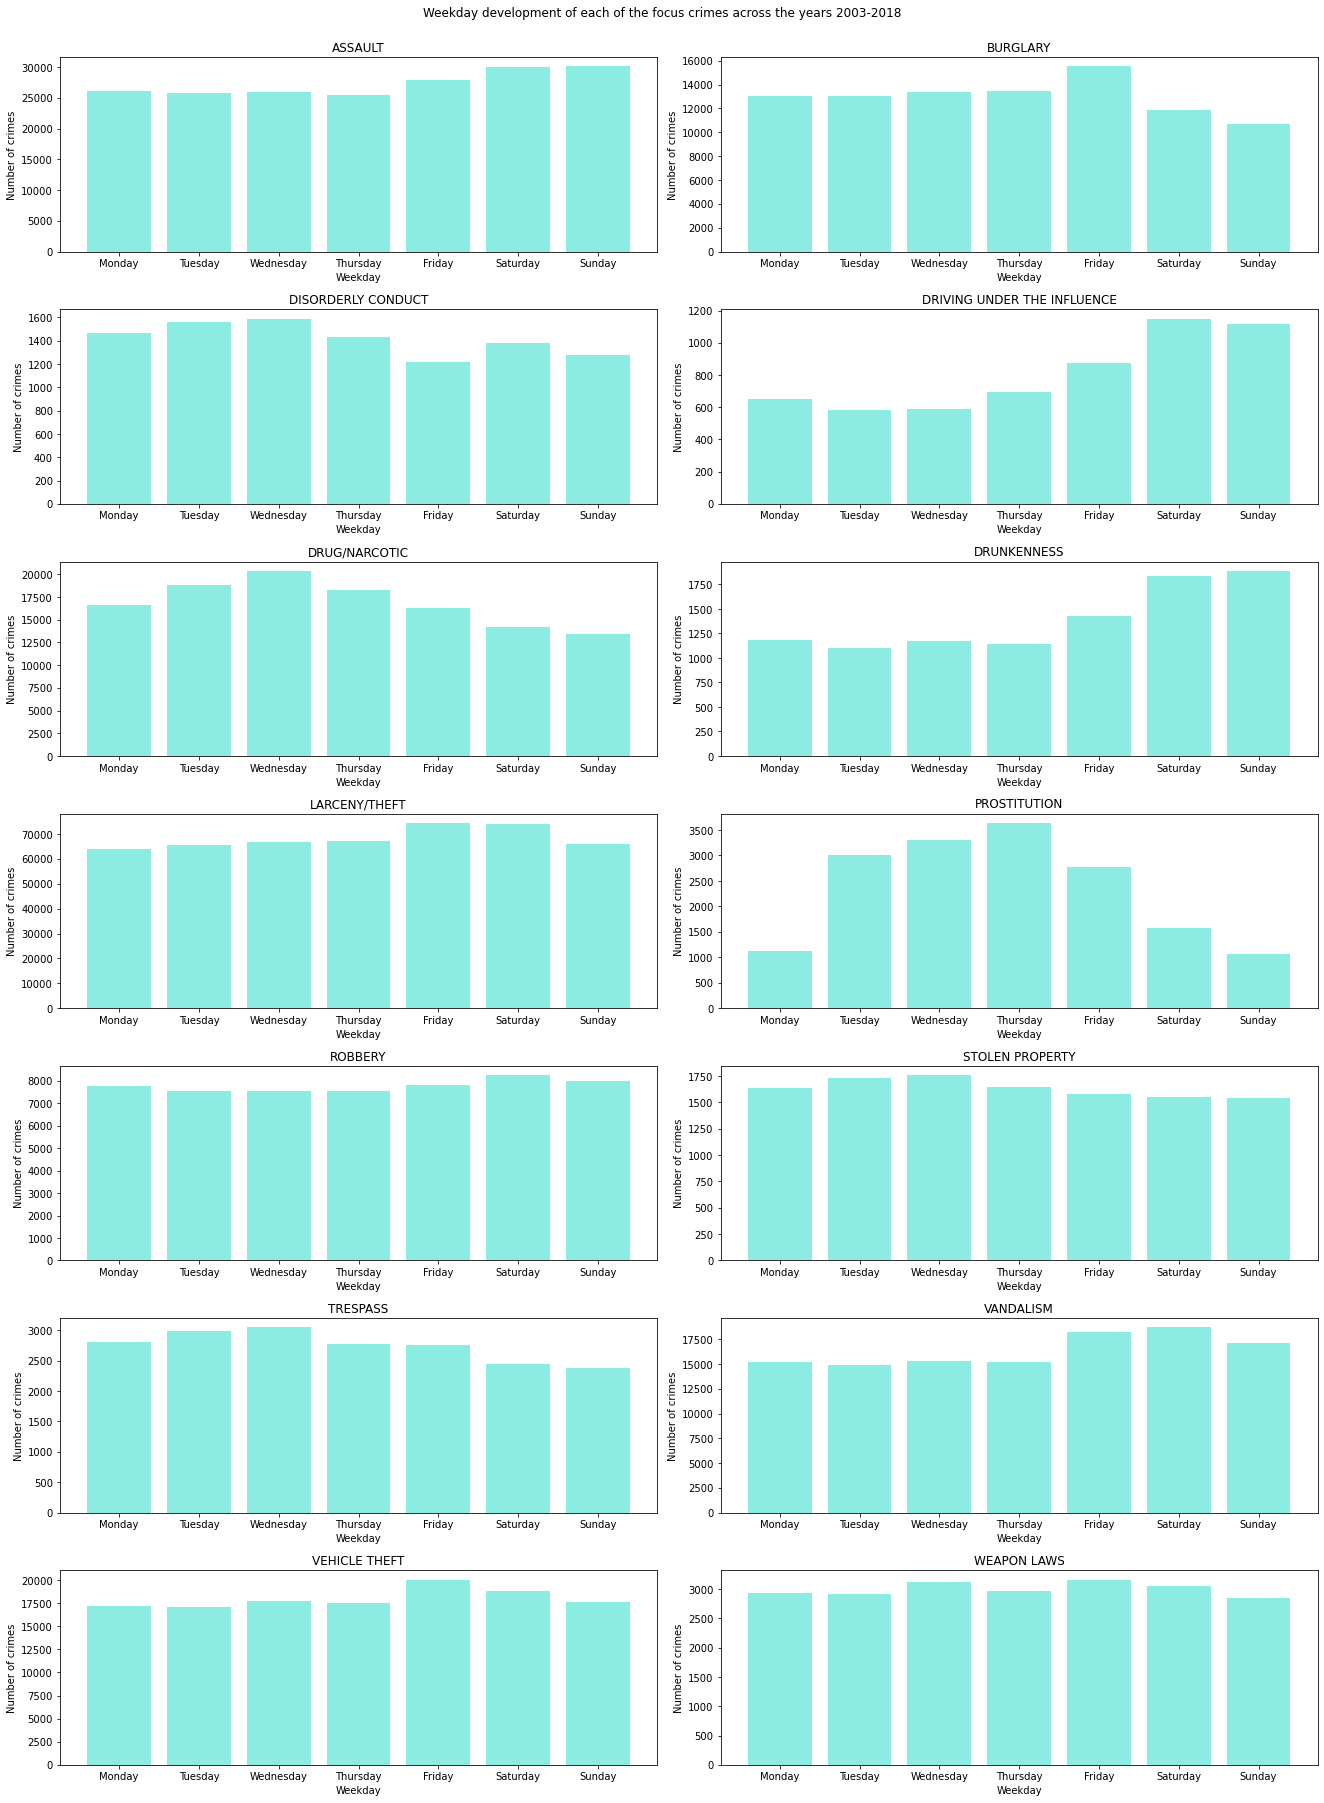

In [4]:
# Get weekly data
counts_per_day = data_focus_crimes.groupby(['Category', 'DayOfWeek'])['DayOfWeek'].count() 
week_days_ordered = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Plotting bar-plots of weeks
rows = int(len(focuscrimes)/2)
cols = 2
fig, ax = plt.subplots(rows, cols,figsize=(15, 15))
fig.suptitle('Weekday development of each of the focus crimes across the years 2003-2018', y=1)
fig.set_size_inches(18.5,25)
crime_index = 0
for i in range(rows):
    for j in range(cols):
        crime = focuscrimes[crime_index]
        #put the counts in the right order
        ordered_counts = counts_per_day[crime][week_days_ordered]
        ax[i,j].bar(ordered_counts.index, ordered_counts.values, color='turquoise', alpha=0.6)
        ax[i,j].title.set_text(crime)
        ax[i,j].set_xlabel('Weekday')
        ax[i,j].set_ylabel('Number of crimes')
        crime_index+=1
plt.tight_layout()

Bar-plots showing the weekly trend for all focus-crimes. For most of the bar-plot in the weekly trend we expect it to be higher in the weekend than during the week. In the bar-plot showing driving under the influence we see that this is the case. In weekend the number of occurance is maximum, because people are normally off work in those days and usually go out for a drink. Also the same trend is seen in the plot showing drunkness crimes.

Though an unexpected finding is seen in the plot showing drug/narcotic crimes. The peak is in the middle of the weekdays, on Wednesday, and the weekend have the lowest number crimes from all the days of the week.

- *The months*. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?

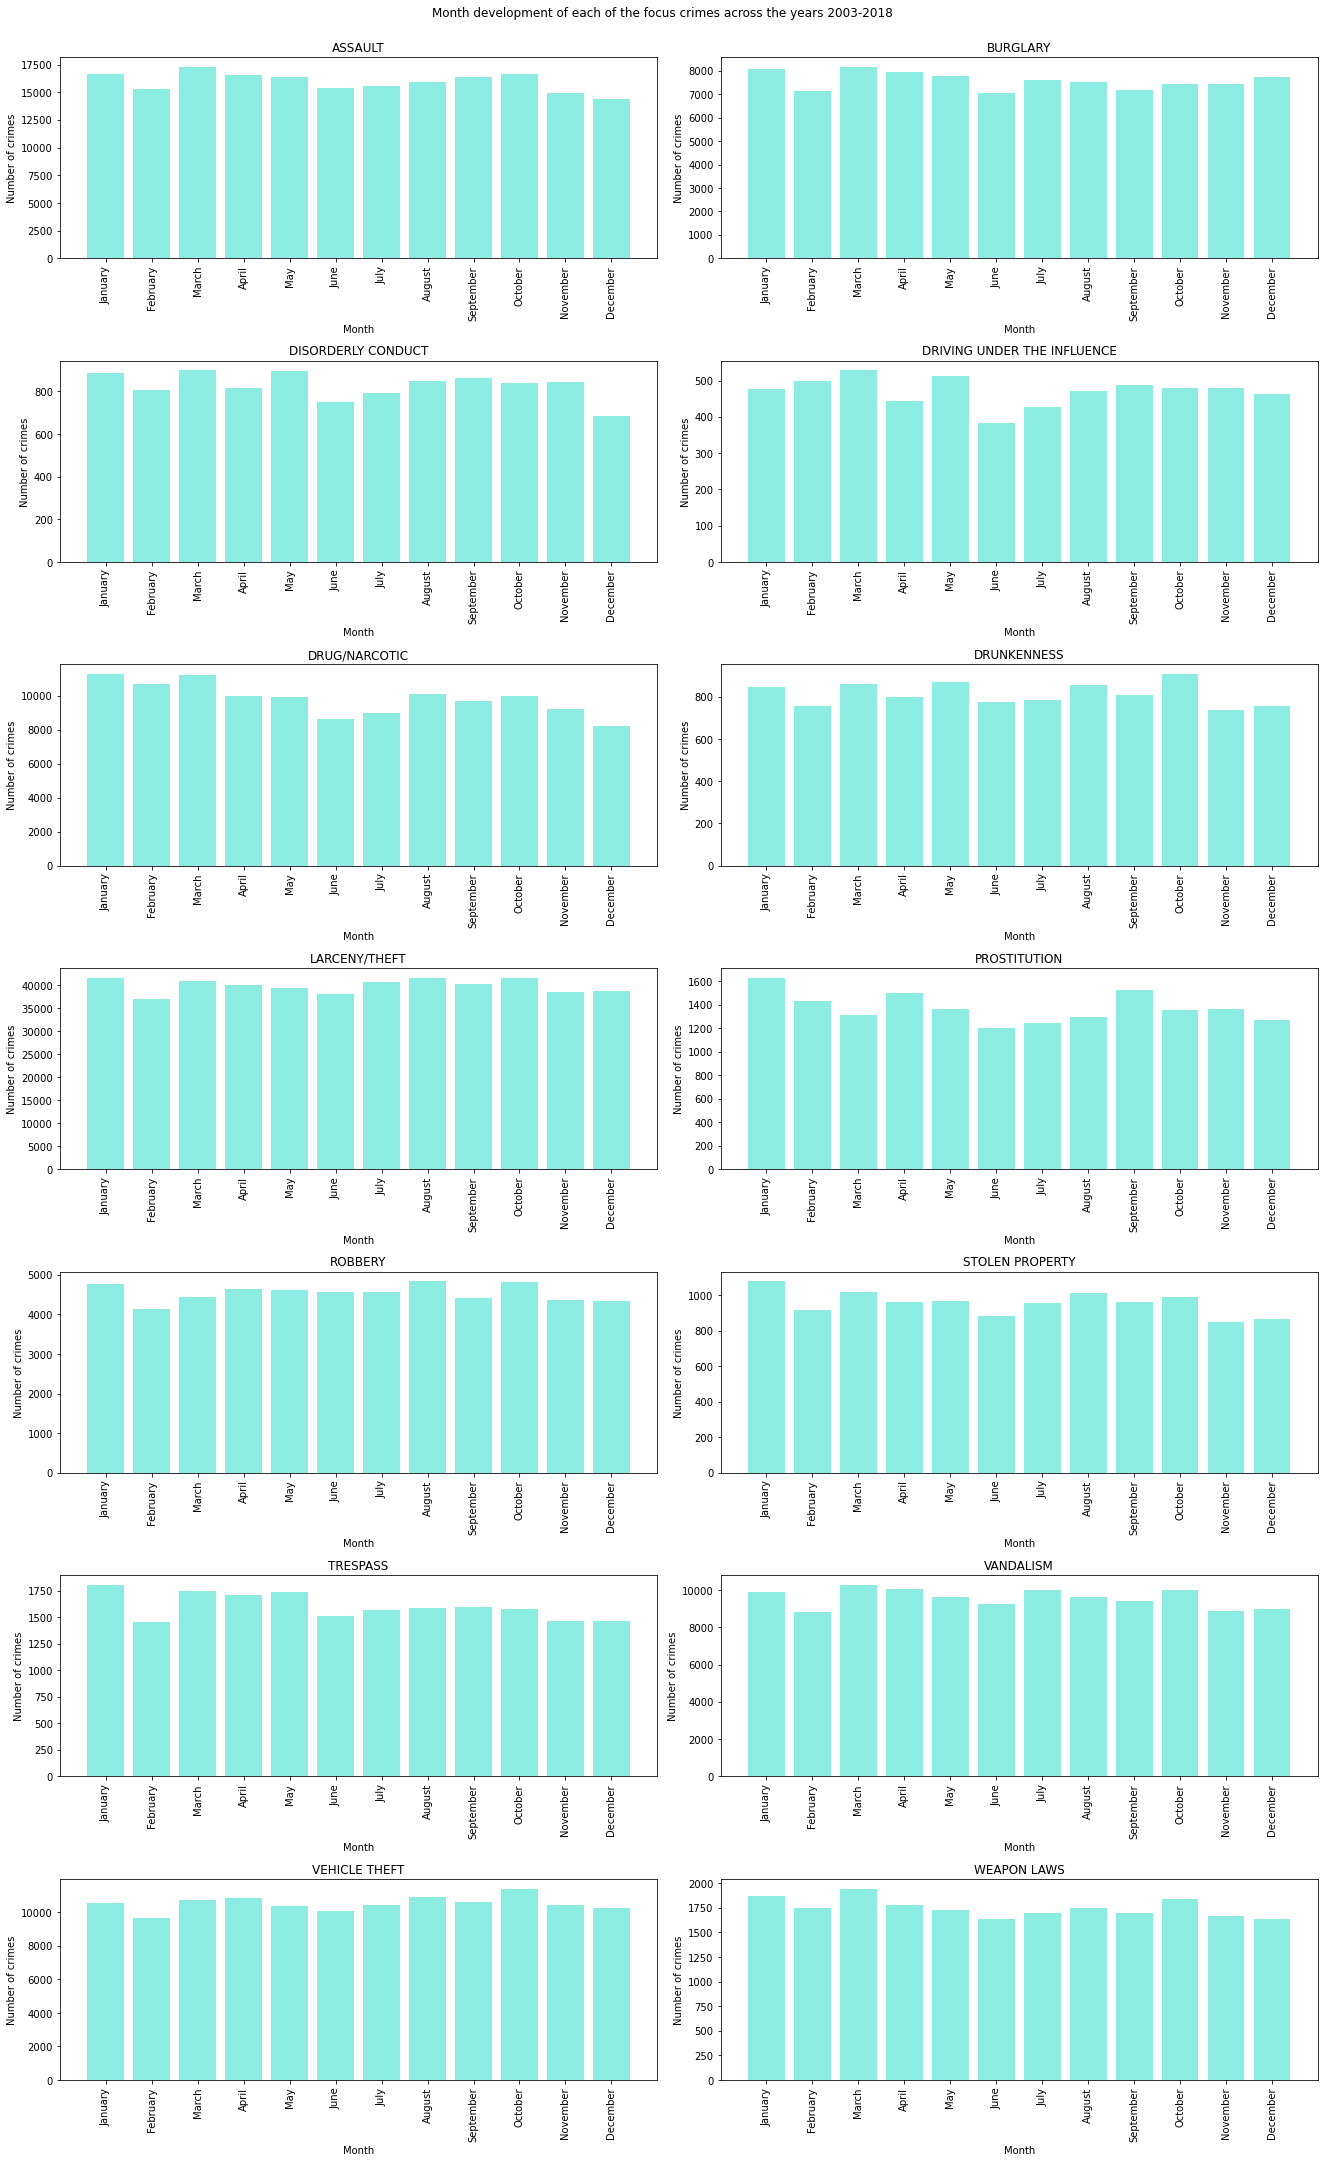

In [5]:
# Get monthly data
counts_per_month = data_focus_crimes.groupby(["Category", data_focus_crimes.Date.dt.month])["PdId"].count()

# Plotting bar-plots of months
fig, ax = plt.subplots(rows, cols,figsize=(30, 30))
fig.suptitle('Month development of each of the focus crimes across the years 2003-2018',y=1)
fig.set_size_inches(18.5,30)
crime_index = 0
for i in range(rows):
    for j in range(cols):
        crime = focuscrimes[crime_index]
        month_names = [calendar.month_name[month_number] for month_number in counts_per_month[crime].index]
        ax[i,j].bar(month_names, counts_per_month[crime].values, color='turquoise', alpha=0.6)
        ax[i,j].title.set_text(crime)
        ax[i,j].set_xlabel('Month')
        ax[i,j].set_ylabel('Number of crimes')
        ax[i,j].tick_params(axis='x',labelrotation=90)
        crime_index+=1
plt.tight_layout()

Bar-plots showing the yearly trend per month for all focus-crimes. Not much variation is seen throughout the different months of the year in almost all of the crimes. Though some surprises is seen in the months June-July for driving under the influence crimes and prostitution crimes. These are quite lower in number of crimes in comparison of the other months.

- *The 24 hour cycle*. We'll can also forget about weekday and simply count up the number of each crime-type that occurs in the entire dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see.

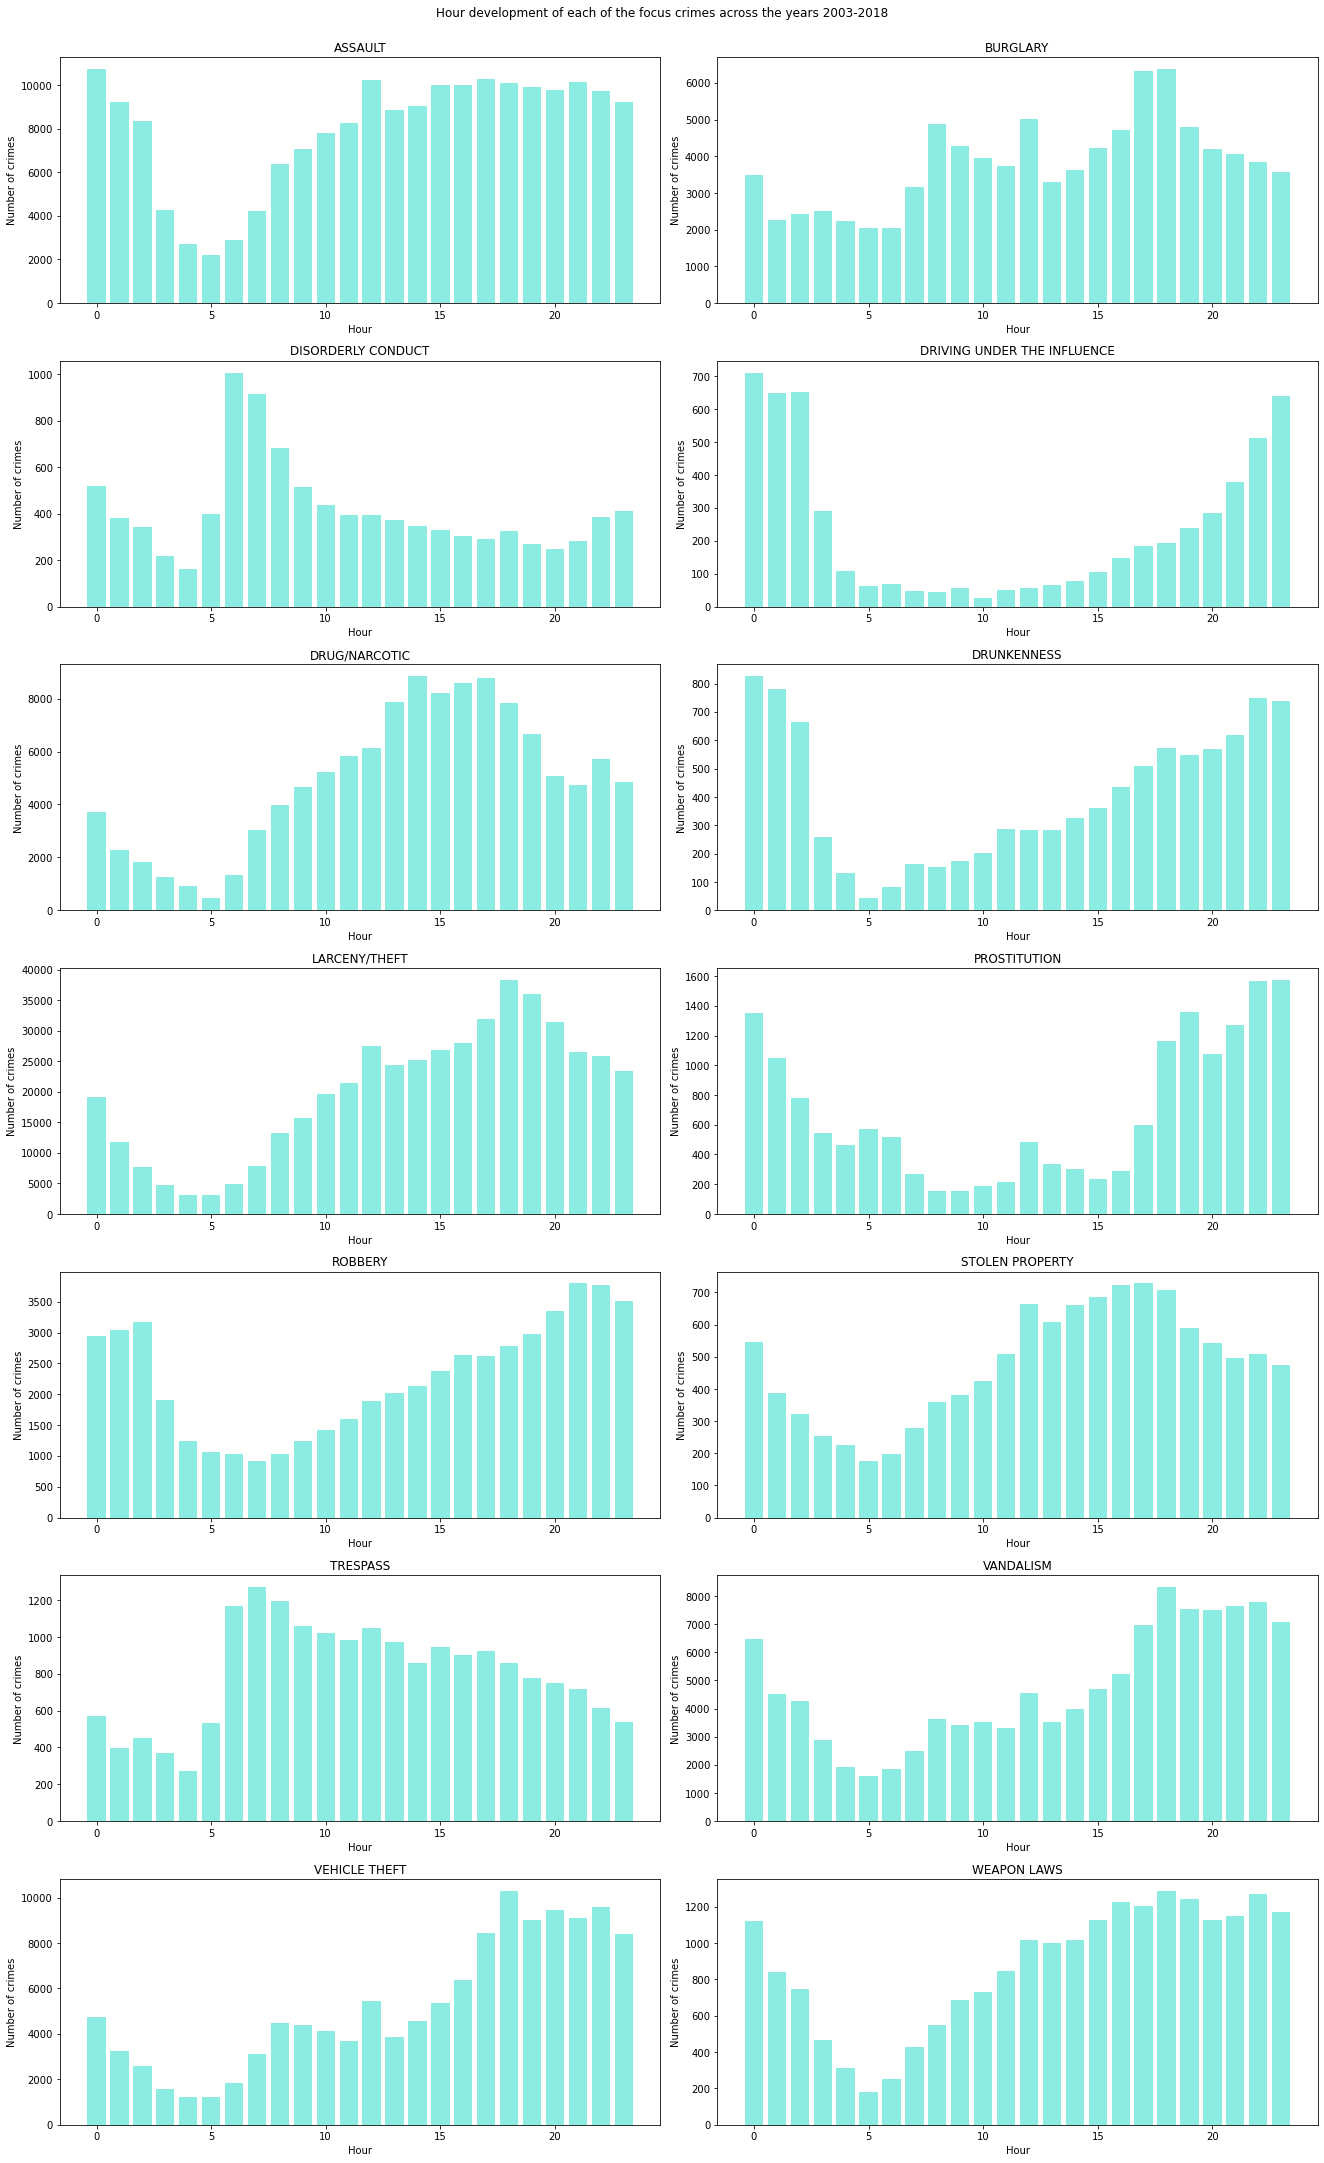

In [6]:
# Get data by hour
counts_per_hour = data_focus_crimes.groupby(["Category", data_focus_crimes.Time.dt.hour])["PdId"].count()

# Plotting bar-plots of hours
fig, ax = plt.subplots(rows, cols,figsize=(30, 30))
fig.suptitle('Hour development of each of the focus crimes across the years 2003-2018',y=1)
fig.set_size_inches(18.5,30)
crime_index = 0
for i in range(rows):
    for j in range(cols):
        crime = focuscrimes[crime_index]
        ax[i,j].bar(np.arange(0,24), counts_per_hour[crime].values, color='turquoise', alpha=0.6)
        ax[i,j].title.set_text(crime)
        ax[i,j].set_xlabel('Hour')
        ax[i,j].set_ylabel('Number of crimes')
        crime_index+=1
plt.tight_layout()

Bar-plots showing the daily trend per hour for all focus-crimes. Most of the bar-plots show that the crimes are low in numbers during the morning and high in numbers during the evening and night time. Though two crimes, disorderly conduct and trespass, are different from the other crimes in the hourly trend, where they show highest number in crimes around 6am-7am.  

- *Hours of the week*. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.

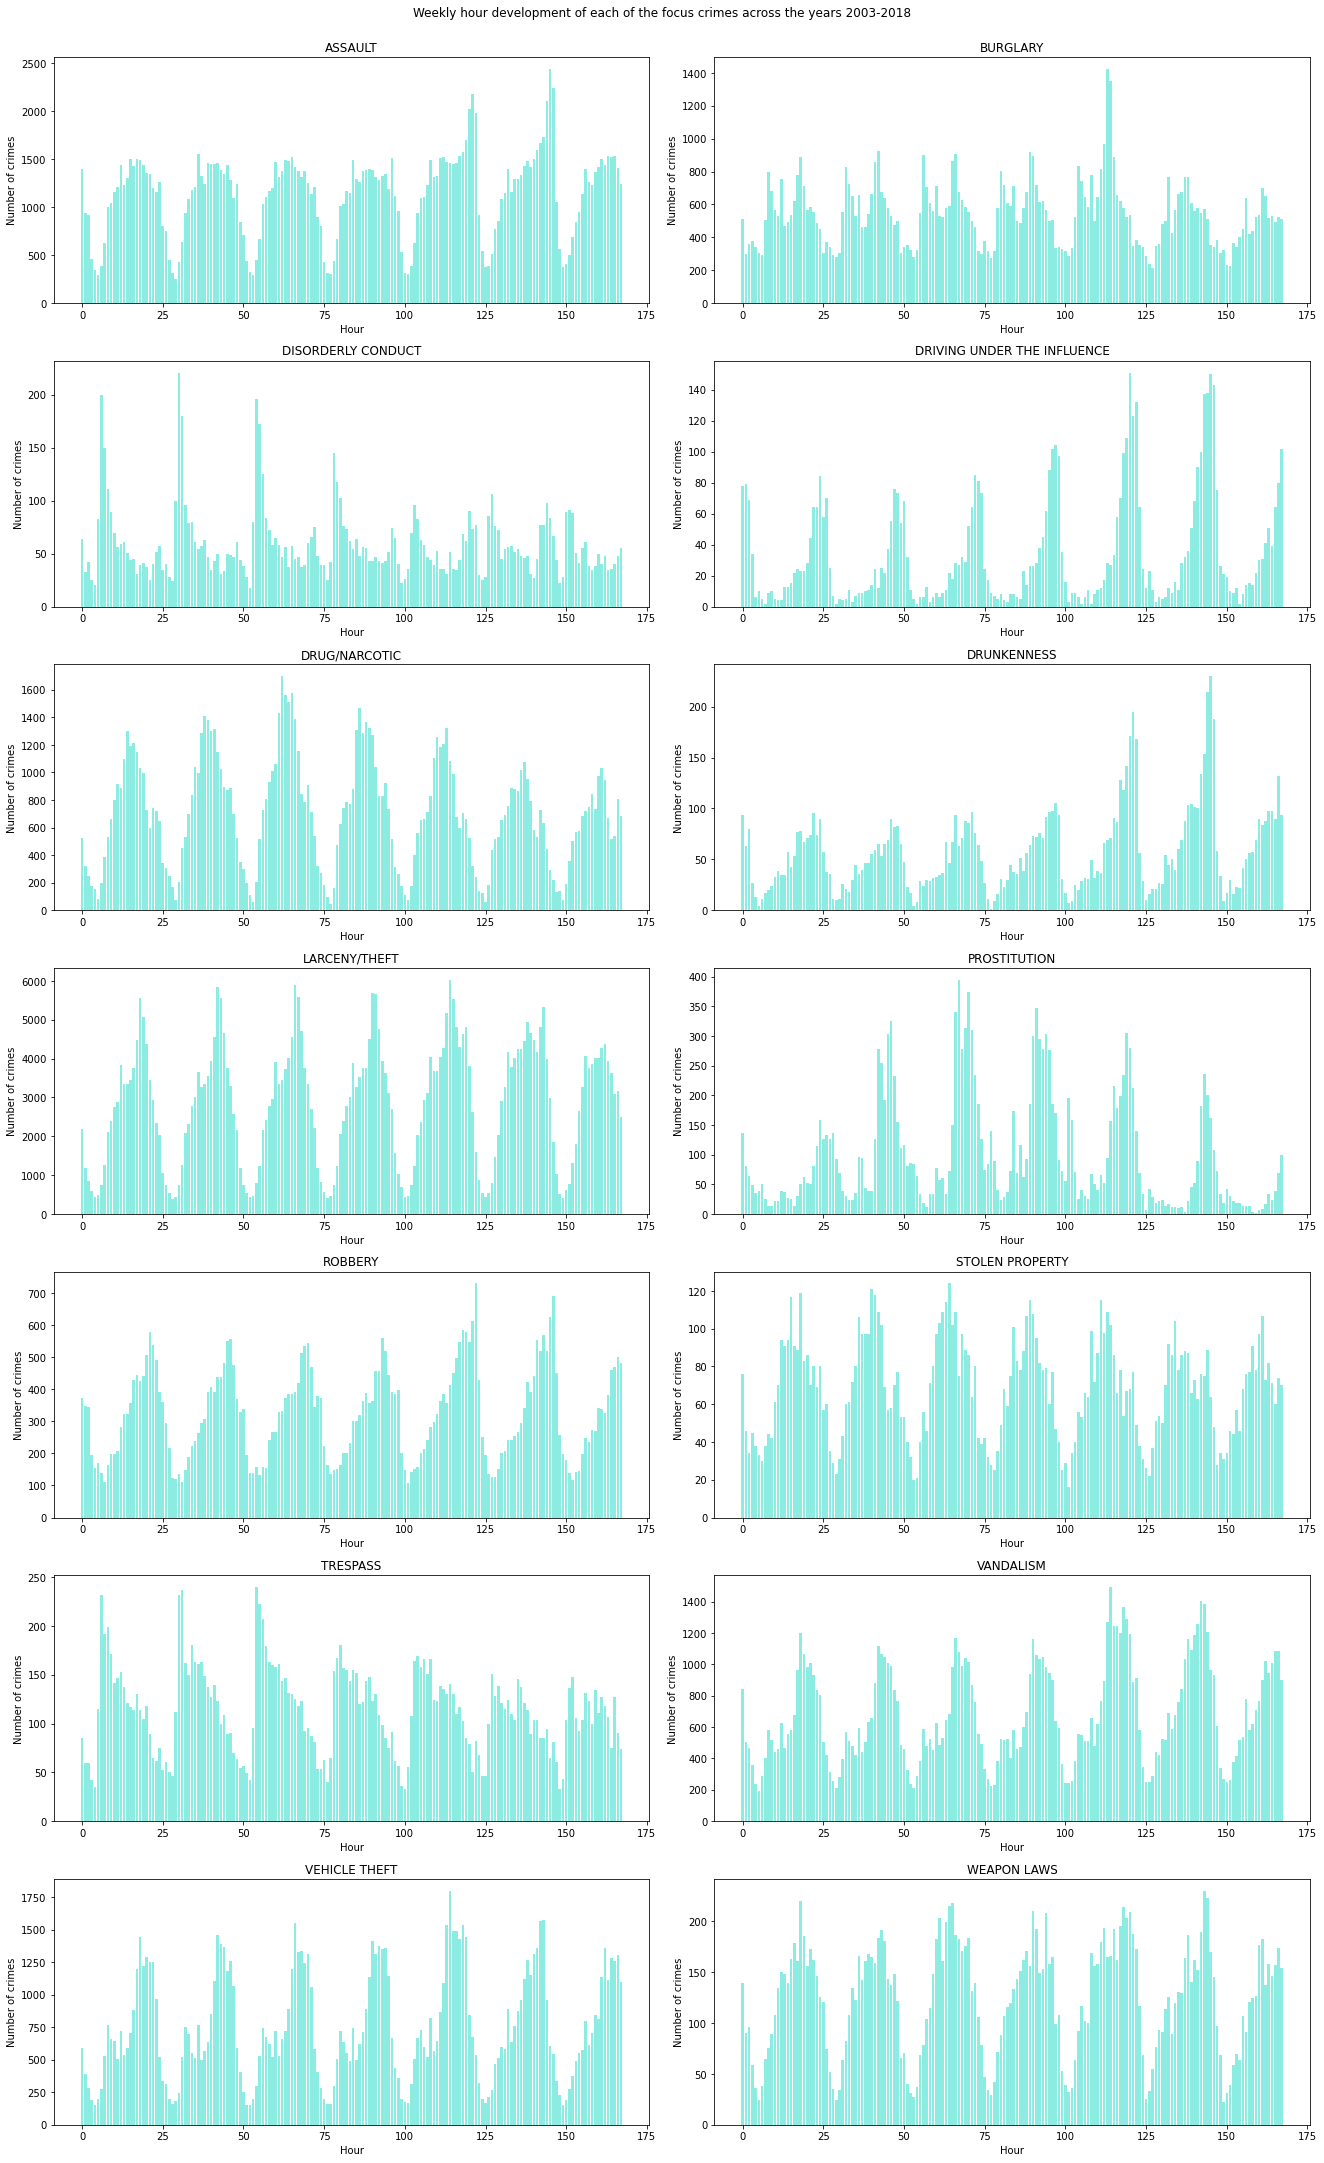

In [7]:
# Group data by categories of crimes 
group_by_category = data_focus_crimes.groupby("Category")

# Plotting histograms of hours of the week 
fig, ax = plt.subplots(rows, cols,figsize=(50, 80))
fig.suptitle('Weekly hour development of each of the focus crimes across the years 2003-2018', y=1)
fig.set_size_inches(18.5,30)
crime_index = 0
for i in range(rows):
    for j in range(cols):
        crime = focuscrimes[crime_index]
        #get the timestamp (date + hour)
        crime_timestamps = group_by_category.get_group(crime)['Time']
        #get the hour
        crime_hours_24 = [crime_timestamps[index].hour for index in crime_timestamps.index]
        #get the day of the week
        crime_day_of_week = [crime_timestamps[index].dayofweek for index in crime_timestamps.index]
        #calculate the week hour (between 0 and 167)
        crime_hours_168 = [h + 24*wd for (h,wd) in zip(crime_hours_24,crime_day_of_week)]
        week_hours = np.arange(0,24*7)
        #count the number of occurrences of each crime for every week hour
        crime_hours_168_counts = [crime_hours_168.count(hour) for hour in week_hours]
        ax[i,j].bar(week_hours, crime_hours_168_counts, alpha=0.6, color='turquoise')
        ax[i,j].title.set_text(crime)
        ax[i,j].set_xlabel('Hour')
        ax[i,j].set_ylabel('Number of crimes')
        crime_index+=1
plt.tight_layout()

Bar-plots showing the weekly trend per hour for all focus-crimes. In most of the bar-plots we see that the daily trend of the crimes repeats itself most of the days in the week and that in the weekends we usually see an increase in crimes. Though we see that burglary crimes has an interesting peak on fridays evenings/nigths and also trespass are generally higher in the beginning of the week compared to the rest of the week.

It should also be noticed that the crime patterns per day are very similar in all crimes except for prostitution, where it differs quite a lot from day to day.

# Part 2: Thinking about data and visualization
*Excercise*: Questions for the second video lecture.

- As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?

The Pearson correlation is a number between -1 and +1 that indicates to which extent 2 variables are linearly related and the direction of this linear relationship.

-1 indicates a perfect negative correlation, +1 indicates a perfect positive correlation, and 0 indicates no correlation at all.

The formula for calculating Pearson's correlation coefficient is:

$$\begin{align}
\rho_{X,Y} = \frac{cov(X,Y)}{\sigma_{X} \sigma_{Y}}
\end{align}$$

where:

- $cov$ is the covariance
- $\sigma_{X}$ is the standard deviation of X
- $\sigma_{Y}$ is the standard deviation of Y

A situation where the Pearson correlation fails is when two variables have a non-linear relationship. We illustrate it below.

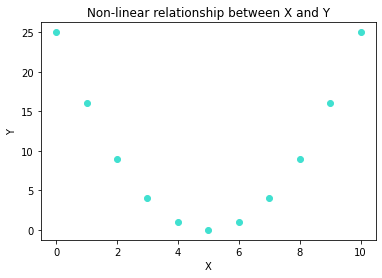

In [8]:
# Generating data
X = np.arange(0,11)
Y = (X-5)*(X-5)

# Plotting data
plt.scatter(X, Y, c = 'turquoise')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear relationship between X and Y')
plt.show()

In [9]:
# Calculating pearson's correlation
sigma_x = np.std(X)
sigma_y = np.std(Y)
cov = np.cov(X,Y)[0][1]
r = cov/(sigma_x*sigma_y)
print("Pearson's correlation is", r)

Pearson's correlation is 0.0


From the graphical representation we can see that the two variables have a relationship, but the Pearson correlation fails to detect it, indicating that it is 0 (no correlation).

- What is the difference between a bar-chart and a histogram?

The main difference between a bar-chart and a histogram is the fact that in a bar-chart, the X axis represents a group defined by a categorical variable while in a histogram, the X axis has a low and high end which define an interval/bin into which data is grouped. Therefore, histograms plot quantitative data while bar-charts plot categorical data. Another difference is that bins cannot be rearranged while the groups from the bar-charts can.

- I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it.

We can choose the bin size manually. Usually, the number of bins should be between 5 and 20. If at all possible, try to make your data set evenly divisible by the number of bins. For example, if you have 10 pieces of data, work with 5 bins instead of 6 or 7. Look at the bin size and see if the visualization of the histogram provides the rigth amount of information.

We may also use the square-root method in order to find the best number of bins $k$:

$$\begin{align}
k = \left \lceil{\sqrt(n)}\right \rceil 
\end{align}$$

where $n$ is the sample size.

# Part 3: Generating important plot types

*Excercise*: Let us recreate some plots from DAOST but using our own favorite dataset.

- First, let's make a jitter-plot (that is, code up something like Figure 2-1 from DAOST from scratch), but based on SF Police data. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the exact time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.

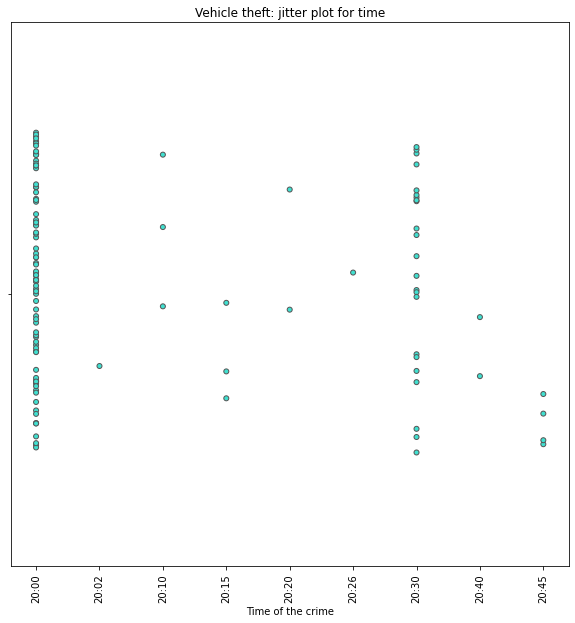

In [10]:
# Categorise the data
vehicle_thefts_df = data_focus_crimes.loc[data_focus_crimes['Category'] == 'VEHICLE THEFT']

# Get the date- and time interval
time_interval = pd.Interval(pd.Timestamp('2010-01-01 00:00:00'),
                        pd.Timestamp('2010-06-01 00:00:00'),
                        closed='left')
thefts_in_interval = vehicle_thefts_df.loc[[ts in time_interval for ts in vehicle_thefts_df['Time']]]

# Get the data from hour 20.00-21.00
between_8_9_PM = thefts_in_interval.loc[[ts.hour==20 for ts in thefts_in_interval['Time']]]

# Sort the data by time
hour_minutes = sorted(["{}:{:02d}".format(ts.hour, ts.minute) for ts in between_8_9_PM['Time']])

# Plotting the jitter-plot
plt.figure(figsize=(10,10))
sns.stripplot(x=hour_minutes, jitter=0.3, linewidth=1, color='turquoise')
plt.tick_params(labelrotation=90)
plt.title("Vehicle theft: jitter plot for time")
plt.xlabel("Time of the crime")
plt.show()

Jitter-plot showing the crime type: vehicle thef, in the hour 20.00-21.00. The data used are selected from Januar to June in year 2010.

From the jitter-plot it is seen that most of the arrests for vehicle theft crimes are happening around 20.00 and around 20.30. Not many are detected in the minutes in between. This might indicate that the police officers are rounding up to the closest hour or hour and a half, as it does not make sence that this much crimes are happining  one minute over another in the time span of only one hour.  

- Now for some histograms (please create a crime-data based versions of the plot-type shown in DAOST Figure 2-2). (I think the GPS data could be fun to understand from this perspective.)
    - This time, pick two crime-types with different geographical patterns and a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
    - Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like numpy.histogram. This function gives you the counts and then you do your own plotting.

In [11]:
# Categorise data for crime 1 = DRIVING UNDER THE INFLUENCE and crime 2 = TRESPASS
crime1_df = data_focus_crimes.loc[data_focus_crimes['Category'] == 'DRIVING UNDER THE INFLUENCE']
crime2_df = data_focus_crimes.loc[data_focus_crimes['Category'] == 'TRESPASS']

# Get the date- and time interval 
time_interval = pd.Interval(pd.Timestamp('2010-01-01 00:00:00'),
                        pd.Timestamp('2015-01-01 00:00:00'),
                        closed='left')

# Update of Time in the dataframes 
crime1_in_interval = crime1_df.loc[[ts in time_interval for ts in crime1_df['Time']]]
crime2_in_interval = crime2_df.loc[[ts in time_interval for ts in crime2_df['Time']]]

# Printing number of crimes
print("We have", crime1_in_interval.shape[0], "number of crimes of the type DRIVING UNDER THE INFLUENCE")
print("We have", crime2_in_interval.shape[0], "number of crimes of the type TRESPASS")

We have 2170 number of crimes of the type DRIVING UNDER THE INFLUENCE
We have 5667 number of crimes of the type TRESPASS


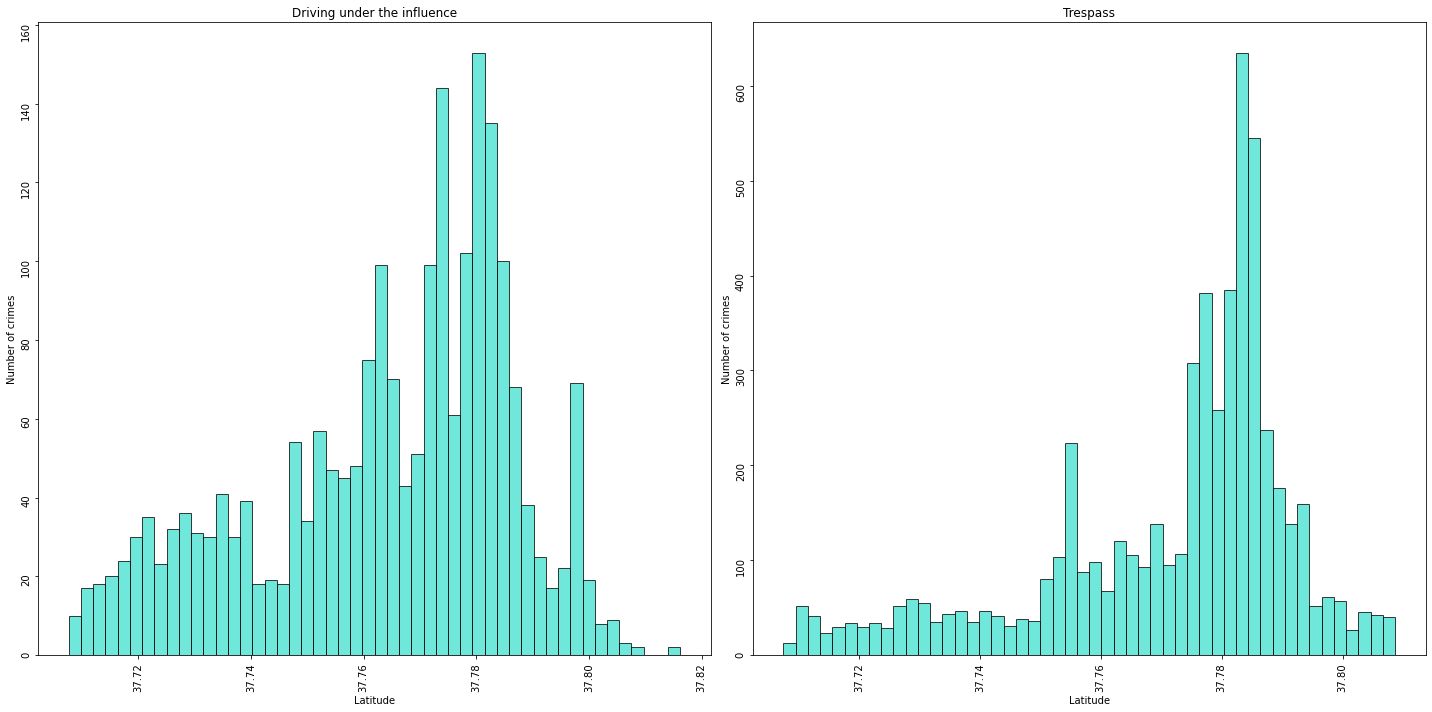

In [12]:
# Get the lattitude values
crime1_lat = crime1_in_interval['Y']
crime2_lat = crime2_in_interval['Y']

# Plotting the histograms of crime 1 and crime 2
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 10))
ax1.hist(crime1_lat, bins=50, color='turquoise', edgecolor='black', align='left',alpha=0.75)
ax1.tick_params(labelrotation=90)
ax1.title.set_text("Driving under the influence")
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Number of crimes')

ax2.hist(crime2_lat, bins=50, color='turquoise', edgecolor='black', align='left',alpha=0.75)
ax2.tick_params(labelrotation=90)
ax2.title.set_text("Trespass")
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Number of crimes')

fig.tight_layout()
plt.show()

Two histograms showing the number of crimes over the latitude value for the crimes driving under the influence and trespass. 

The histogram to the left is showing driving under influence crimes. We see that it is left-skewed histogram with the major peak around the latitude value 37.78.

The histogram to the right is showing the trespass crimes. We see that it is also a left-skewed histogram with the major peak around the latitude value 37.78-37.79.

It should be noticed that the number of crimes are much higer for the trespass crime than for the driving under influence crime, but the trend over the latitude values are very similar. This could indicate that the crimes are both happening around the same area of the city.

# Part 4: A bit of geo-data

*Exercise*: A new take on geospatial data using Folium (see the Week 4 exercises for full info and tutorials).

Now we look at studying geospatial data by plotting raw data points as well as heatmaps on top of actual maps.

- First start by plotting a map of San Francisco with a nice tight zoom. Simply use the command folium.Map([lat, lon], zoom_start=13), where you'll have to look up San Francisco's longitude and latitude.

In [13]:
# Plotting the map of San Francisco using folium
sf_map = folium.Map([37.773972, -122.431297], zoom_start=13, tiles = "Stamen Toner")
sf_map.get_root().html.add_child(folium.Element("San Francisco map"))
sf_map

The map of San Francisco is shown using the folium package, where the latitude = 37.773972 and the longitude = -122.431297.

- Next, use the the coordinates for SF City Hall 37.77919, -122.41914 to indicate its location on the map with a nice, pop-up enabled maker. (In the screenshot below, I used the black & white Stamen tiles, because they look cool).

In [14]:
# Simple marker of city hall
folium.Marker([37.77919, -122.41914],
              popup='City Hall',
              icon=folium.Icon(color='blue')
             ).add_to(sf_map)

sf_map

In the map of San Francisco a marker is made showing the location of the City Hall.

- Now, let's plot some more data (no need for popups this time). Select a couple of months of data for 'DRUG/NARCOTIC' and draw a little dot for each arrest for those two months. You could, for example, choose June-July 2016, but you can choose anything you like - the main concern is to not have too many points as this uses a lot of memory and makes Folium behave non-optimally. We can call this a kind of visualization a point scatter plot.

In [15]:
# Categorise data for DRUG/NARCOTIC
drugs_df = data.loc[data['Category'] == 'DRUG/NARCOTIC']

# Get the date- and time interval 
time_interval = pd.Interval(pd.Timestamp('2016-06-01 00:00:00'),
                        pd.Timestamp('2016-07-01 00:00:00'),
                        closed='left')
drugs_in_interval = drugs_df.loc[[ts in time_interval for ts in drugs_df['Time']]]

# Get the latitude (Y) and longitude (X) values
X = drugs_in_interval['X'].values
Y = drugs_in_interval['Y'].values

# Plot scatter plot on the map
for index in range(len(X)):
    folium.CircleMarker(
        [Y[index], X[index]],
        radius=7,
        color='b',
        fill=True,
        fill_color = 'red',
        fill_opacity=0.8
        ).add_to(sf_map)

sf_map

In the map of San Francisco a scatter plot of the location of drug/narcotic crimes are displayed as red dots.
It should be noticed that most of the crimes are located around the city hall, which is the downtown of San Francisco.

# Part 5: Errors in the data. The importance of looking at raw (or close to raw) data.

We started the course by plotting simple histogram plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data.

1. In the hourly activity for PROSTITUTION something surprising is going on on Thursday. Remind yourself [here](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/prostitution_hourly.png), where I've highlighted the phenomenon I'm talking about.
2. When we investigated the details of how the timestamps are recorded using jitter-plots, we saw that many more crimes were recorded e.g. on the hour, 15 minutes past the hour, and to a lesser in whole increments of 10 minutes. Crimes didn't appear to be recorded as frequently in between those round numbers. Remind yourself [here](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/jitter_plot.png), where I've highlighted the phenomenon I'm talking about.
3. And finally, today we saw that the Hall of Justice seemed to be an unlikely hotspot for sex offences. Remind yourself [here](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/crime_hot_spot.png).

*Exercise*: Data errors. The data errors we discovered above become difficult to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, when we visualize, errors become difficult to notice when when we bin the data. We explore this process in the exercise below.

- For each of the three examples above, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. Also briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).

When we are binning data, we group the values into a smaller number of bins/intervals. When we aggreate data this way, we replace a value by the one that represents the whole interval. Therefore, if there are data-errors for some values, they will bias the whole group. Furthermore, because the data is grouped, it is hard to notice errors and where they come from.

In the first example, we notice that the number of occurences of prostitution is highest on Thursdays. When binning the data, it would result in a surprising mid-week behavior because one would expect to see the highest occurences during the weekends. Not noticing this error would lead to misconceptions about the high prostitution rate during mid-week days.

In the second example, we notice that policemen didn't indicate the exact time when a crime was recorded. So, instead of being evenly spread out, the data is concentrated on the hour and 15 minutes past the hour. When binning this data we would observe a high number of crime occurrences near whole hours leading to misconceptions about crimes happening more often at whole hours rathers than being sparse in time.

In the last example, we notice a surprising number of sex offences which were recorded at the Hall of Justice. When binning the data by geographical zones, this would lead to a biased group where the number of crimes would be higher compared to other zones. As a consequence, misconceptions about how dangerous a given zone is may appear.